<a href="https://colab.research.google.com/github/Mint0511/PTDL-25-26/blob/minh/DA06%20/%202_1_3_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Bài toán dự đoán khả năng sống sót của một hành khách trên tàu Titanic**

## Nhiệm vụ 1: Xây dựng Cây quyết định bằng thư viện Scikit-Learn

Bước 1: Tải các package và nạp dữ liệu

Trong bối cảnh dữ liệu Titanic, ta cần thêm các bước tiền xử lý để làm sạch và mã hóa dữ liệu.

In [3]:
import numpy as np # numerical computation
import pandas as pd # data wrangling
import matplotlib.pyplot as plt # plotting package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# import graphviz # to visualize decision trees (bị bỏ qua do không khả dụng)
from sklearn.tree import export_graphviz
import matplotlib as mpl

# Nạp dữ liệu
df = pd.read_csv("train.csv")

# Tiền xử lý dữ liệu Titanic
# Điền giá trị thiếu
# -------------------------------------------------------------------------
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# -------------------------------------------------------------------------

# Lựa chọn Feature và loại bỏ cột không liên quan ('ID' tương đương)
items_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=items_to_remove, inplace=True)

# Mã hóa biến phân loại (Sex, Embarked)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Định nghĩa Features (X) và Target (y)
target_name = 'Survived'
feature_names = df.columns.tolist()
feature_names.remove(target_name)

Bước 2: Chuẩn bị dữ liệu cho tập train và tập test

In [4]:
# Chia dữ liệu (80% train, 20% test)
X = df[feature_names].values
y = df[target_name].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Bước 3: Xây dựng cây quyết định

Xây dựng mô hình với độ sâu tối đa là $\mathbf{2}$ (max_depth=2).

In [5]:
dt = DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

Bước 4: Hiển thị cây quyết định với package graphviz

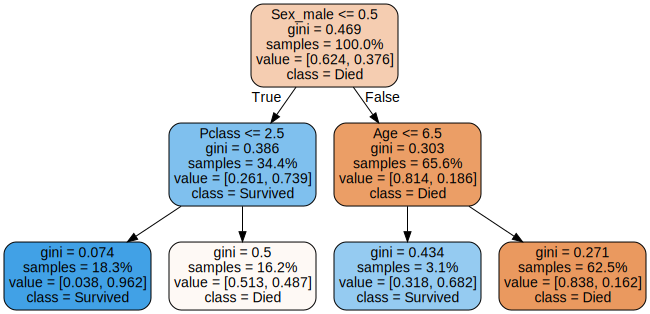

In [7]:
import graphviz
dot_data = export_graphviz(dt,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=feature_names,
                            proportion=True,
                            class_names=['Died', 'Survived'])
graph = graphviz.Source(dot_data)
graph

## Nhận Xét

Cây quyết định này dự đoán khả năng Sống Sót ($\text{Survived}$) hay Tử Vong ($\text{Died}$) của hành khách Titanic.

###  Các Quy Tắc Dự Đoán Chính

1.  **Phụ nữ (Sex\_male $\le 0.5$) là nhóm có khả năng sống sót cao nhất (73.9% Survived).**
    * **Nữ Hạng 1 & 2 ($\text{Pclass} \le 2.5$)**: Dự đoán là $\text{Survived}$. Đây là nút lá tinh khiết nhất ($\text{gini} = 0.074$).
    * **Nữ Hạng 3 ($\text{Pclass} > 2.5$)**: Dự đoán là $\text{Died}$ (mặc dù tỷ lệ sống/chết gần $50/50$).

2.  **Nam giới (Sex\_male $> 0.5$) là nhóm có khả năng tử vong cao nhất (81.4% Died).**
    * **Nam Trưởng Thành ($\text{Age} > 6.5$)**: Chiếm $62.5\%$ tổng số mẫu và được dự đoán là $\text{Died}$ với tỷ lệ $83.8\%$ tử vong.
    * **Trẻ em Nam ($\text{Age} \le 6.5$)**: Được dự đoán là $\text{Survived}$ (với $68.2\%$ sống sót), phản ánh nguyên tắc "trẻ em trước".

### Tóm Tắt

Giới tính ($\text{Sex\_male}$) là biến quan trọng nhất, tiếp theo là Hạng vé ($\text{Pclass}$) đối với phụ nữ và Tuổi ($\text{Age}$) đối với đàn ông, xác nhận mạnh mẽ nguyên tắc cứu hộ "Phụ nữ và Trẻ em trước".

## Nhiệm vụ 2: Tìm tham số tối ưu cho cây quyết định bằng GridSearchCV và vẽ biểu đồ đánh giá mô hình với các tham số khác nhau

Bước 1: Tải các package và nạp dữ liệu

Trong bối cảnh dữ liệu Titanic, ta cần thêm các bước tiền xử lý để làm sạch và mã hóa dữ liệu.

In [ ]:
import numpy as np # numerical computation
import pandas as pd # data wrangling
import matplotlib.pyplot as plt # plotting package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# import graphviz # to visualize decision trees (bị bỏ qua do không khả dụng)
from sklearn.tree import export_graphviz
import matplotlib as mpl

# Nạp dữ liệu
df = pd.read_csv("train.csv")

# Tiền xử lý dữ liệu Titanic
# Điền giá trị thiếu
# -------------------------------------------------------------------------
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# -------------------------------------------------------------------------

# Lựa chọn Feature và loại bỏ cột không liên quan ('ID' tương đương)
items_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=items_to_remove, inplace=True)

# Mã hóa biến phân loại (Sex, Embarked)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Định nghĩa Features (X) và Target (y)
target_name = 'Survived'
feature_names = df.columns.tolist()
feature_names.remove(target_name)

Bước 2: Chuẩn bị dữ liệu cho tập train và tập test

In [ ]:
# Chia dữ liệu (80% train, 20% test)
X = df[feature_names].values
y = df[target_name].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Bước 3: Tạo cây quyết định và xác định các giá trị tham số

In [8]:
from sklearn.model_selection import GridSearchCV
# Các tham số max_depth cần thử
params = {'max_depth': [1, 2, 4, 6, 8, 10, 12]}
dt_opt = DecisionTreeClassifier(random_state=42) # tree modal

# Cấu hình GridSearchCV: scoring='roc_auc', cv=4
cv = GridSearchCV(dt_opt, param_grid=params, scoring='roc_auc',
                  n_jobs=-1, refit=True, cv=4, verbose=0,
                  return_train_score=True)
cv.fit(X_train, y_train)

# In tham số tối ưu
print(f"Tham số tối ưu tìm được: {cv.best_params_}")
print(f"ROC AUC tốt nhất trên Cross-Validation: {cv.best_score_:.4f}")

Tham số tối ưu tìm được: {'max_depth': 4}
ROC AUC tốt nhất trên Cross-Validation: 0.8338


Bước 4: Vẽ biểu đồ đánh giá mô hình

<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
<>:10: SyntaxWarning: invalid escape sequence '\p'
<>:17: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-3428485837.py:10: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE training scores',
/tmp/ipython-input-3428485837.py:17: SyntaxWarning: invalid escape sequence '\p'
  label='Mean $\pm$ 1 SE testing scores',


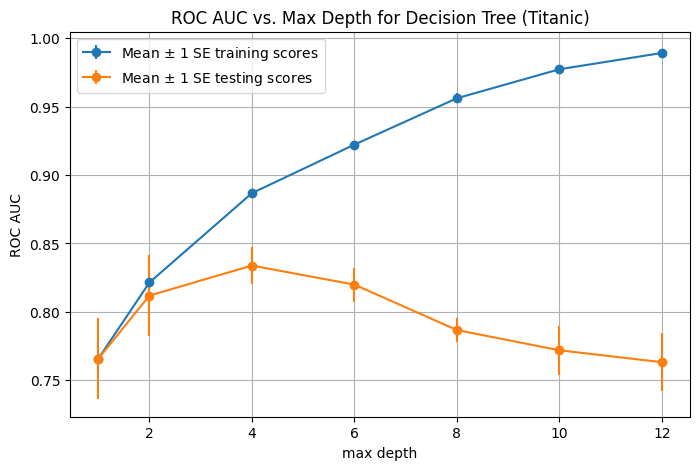

In [9]:
cv_results_df = pd.DataFrame(cv.cv_results_)

plt.figure(figsize=(8, 5))
ax = plt.axes()

# Mean ± 1 SE training scores
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_train_score'],
            yerr=cv_results_df['std_train_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE training scores',
            marker='o')

# Mean ± 1 SE testing scores
ax.errorbar(cv_results_df['param_max_depth'],
            cv_results_df['mean_test_score'],
            yerr=cv_results_df['std_test_score']/np.sqrt(4),
            label='Mean $\pm$ 1 SE testing scores',
            marker='o')

ax.legend()
plt.xlabel('max depth')
plt.ylabel('ROC AUC')
plt.title('ROC AUC vs. Max Depth for Decision Tree (Titanic)')
plt.grid(True)
plt.show() # Hiển thị biểu đồ

## Nhận Xét Biểu Đồ ROC AUC vs. Max Depth

Biểu đồ so sánh hiệu suất Cây Quyết Định trên tập Huấn luyện ($\text{training}$) và Kiểm tra ($\text{testing}$) theo tham số **Max Depth**.

### 1. Điểm Tối Ưu (Optimal Depth)

* **Max Depth = 4** cho hiệu suất tối ưu trên tập kiểm tra ($\text{ROC AUC} \approx 0.835$).

### 2. Vấn Đề Quá Khớp (Overfitting)

* Hiệu suất $\text{training}$ (đường xanh dương) liên tục tăng, đạt $\approx 0.99$ tại $\text{Max Depth} = 12$.
* Hiệu suất $\text{testing}$ (đường cam) **giảm mạnh** sau $\text{Max Depth} = 4$.
* Khoảng cách lớn giữa hai đường cong khi $\text{Max Depth} > 4$ là dấu hiệu **quá khớp nghiêm trọng**. Mô hình ghi nhớ dữ liệu huấn luyện nhưng mất khả năng khái quát hóa dữ liệu mới.

### 3. Kết Luận

Để xây dựng mô hình Cây Quyết Định tốt nhất, nên chọn **Max Depth = 4** để cân bằng giữa độ phức tạp và khả năng khái quát hóa.

## Nhiệm vụ 3: Xây dựng Rừng cây (Random Forest)

Bước 1: Tải các package và nạp dữ liệu

Trong bối cảnh dữ liệu Titanic, ta cần thêm các bước tiền xử lý để làm sạch và mã hóa dữ liệu.

In [ ]:
import numpy as np # numerical computation
import pandas as pd # data wrangling
import matplotlib.pyplot as plt # plotting package
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# import graphviz # to visualize decision trees (bị bỏ qua do không khả dụng)
from sklearn.tree import export_graphviz
import matplotlib as mpl

# Nạp dữ liệu
df = pd.read_csv("train.csv")

# Tiền xử lý dữ liệu Titanic
# Điền giá trị thiếu
# -------------------------------------------------------------------------
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])
# -------------------------------------------------------------------------

# Lựa chọn Feature và loại bỏ cột không liên quan ('ID' tương đương)
items_to_remove = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=items_to_remove, inplace=True)

# Mã hóa biến phân loại (Sex, Embarked)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Định nghĩa Features (X) và Target (y)
target_name = 'Survived'
feature_names = df.columns.tolist()
feature_names.remove(target_name)

Bước 2: Chuẩn bị dữ liệu cho tập train và tập test

In [ ]:
# Chia dữ liệu (80% train, 20% test)
X = df[feature_names].values
y = df[target_name].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Bước 3: Tạo rừng cây với lớp Random ForestClassifier

In [10]:
from sklearn.ensemble import RandomForestClassifier
# Sử dụng max_depth tối ưu tìm được ở Nhiệm vụ 2 (ví dụ max_depth=4)
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=42)

Bước 4: Tìm tham số tối ưu cho mô hình rừng cây và thực hiện train với tham số tối ưu đó

Tìm kiếm số lượng cây (n_estimators) tối ưu từ 10 đến 100.

In [11]:
rf_params_ex = {'n_estimators': list(range(10, 110, 10))}

cv_rf_ex = GridSearchCV(rf, param_grid=rf_params_ex,
                        scoring='roc_auc', n_jobs=-1,
                        refit=True, cv=4, verbose=1,
                        return_train_score=True)

cv_rf_ex.fit(X_train, y_train)

# In tham số tối ưu
print(f"Tham số 'n_estimators' tối ưu: {cv_rf_ex.best_params_}")
print(f"ROC AUC tốt nhất trên Cross-Validation: {cv_rf_ex.best_score_:.4f}")

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Tham số 'n_estimators' tối ưu: {'n_estimators': 20}
ROC AUC tốt nhất trên Cross-Validation: 0.8610


Bước 5: Vẽ biểu đồ đánh giá mô hình rừng cây

<>:19: SyntaxWarning: invalid escape sequence '\p'
<>:19: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipython-input-650037353.py:19: SyntaxWarning: invalid escape sequence '\p'
  axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE')


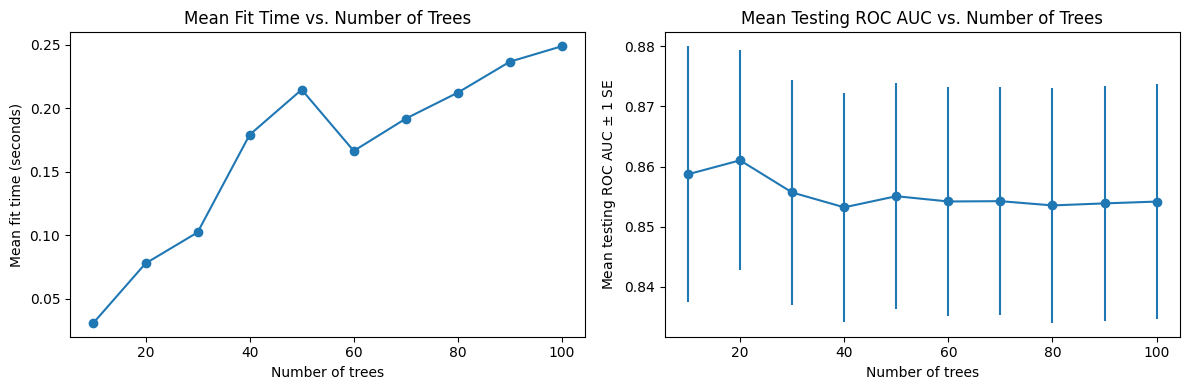

In [12]:
cv_rf_ex_results_df = pd.DataFrame(cv_rf_ex.cv_results_)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Biểu đồ 1: Mean fit time (seconds)
axs[0].plot(cv_rf_ex_results_df['param_n_estimators'],
            cv_rf_ex_results_df['mean_fit_time'],
            marker='o')
axs[0].set_xlabel('Number of trees')
axs[0].set_ylabel('Mean fit time (seconds)')
axs[0].set_title('Mean Fit Time vs. Number of Trees')

# Biểu đồ 2: Mean testing ROC AUC
axs[1].errorbar(cv_rf_ex_results_df['param_n_estimators'],
                cv_rf_ex_results_df['mean_test_score'],
                yerr=cv_rf_ex_results_df['std_test_score']/np.sqrt(4),
                marker='o')
axs[1].set_xlabel('Number of trees')
axs[1].set_ylabel('Mean testing ROC AUC $\pm$ 1 SE')
axs[1].set_title('Mean Testing ROC AUC vs. Number of Trees')
plt.tight_layout()
plt.show() # Hiển thị biểu đồ

## Nhận Xét Biểu Đồ Random Forest (Mean Fit Time & Testing AUC)

Biểu đồ so sánh thời gian huấn luyện ($\text{Fit Time}$) và hiệu suất kiểm tra ($\text{Testing ROC AUC}$) của mô hình Rừng Ngẫu Nhiên ($\text{Random Forest}$) dựa trên **Số lượng Cây ($\text{Number of Trees}$)**.

### 1. Phân Tích Hiệu suất (Biểu đồ bên Phải)

* **Hiệu suất ổn định (Testing ROC AUC):** Giá trị $\text{ROC AUC}$ nằm trong khoảng hẹp từ $\approx 0.854$ đến $\approx 0.861$ và không thay đổi đáng kể khi tăng số lượng cây từ $10$ đến $100$.
* **Điểm Tối ưu:** Hiệu suất cao nhất đạt được tại **20 Cây** ($\text{ROC AUC} \approx 0.861$).
* **Khoảng tin cậy lớn:** Thanh lỗi ($1$ $\text{SE}$) rất dài, cho thấy có sự biến động lớn trong hiệu suất mô hình giữa các lần chạy hoặc tập dữ liệu con.

### 2. Phân Tích Thời gian (Biểu đồ bên Trái)

* **Thời gian huấn luyện (Mean Fit Time):** Thời gian huấn luyện **tăng lên** theo số lượng cây (từ $\approx 0.03$ giây lên $\approx 0.25$ giây). Điều này là hợp lý vì mô hình cần phải xây dựng và huấn luyện nhiều cây hơn.

### 3. Kết Luận

* **Lựa chọn Tối ưu:** Nên chọn **Số lượng Cây bằng 20**. Tại điểm này, mô hình đạt hiệu suất cao nhất ($\approx 0.861$) nhưng chỉ mất thời gian huấn luyện thấp (chưa đến $0.1$ giây), giúp tối ưu hóa cả về **hiệu suất dự đoán** và **tốc độ tính toán**.
* Tăng số lượng cây vượt quá $20$ chỉ làm **tăng thời gian tính toán** mà không mang lại cải thiện đáng kể nào về $\text{ROC AUC}$ kiểm tra.

Bước 6: Xem mức độ quan trọng của từng feature

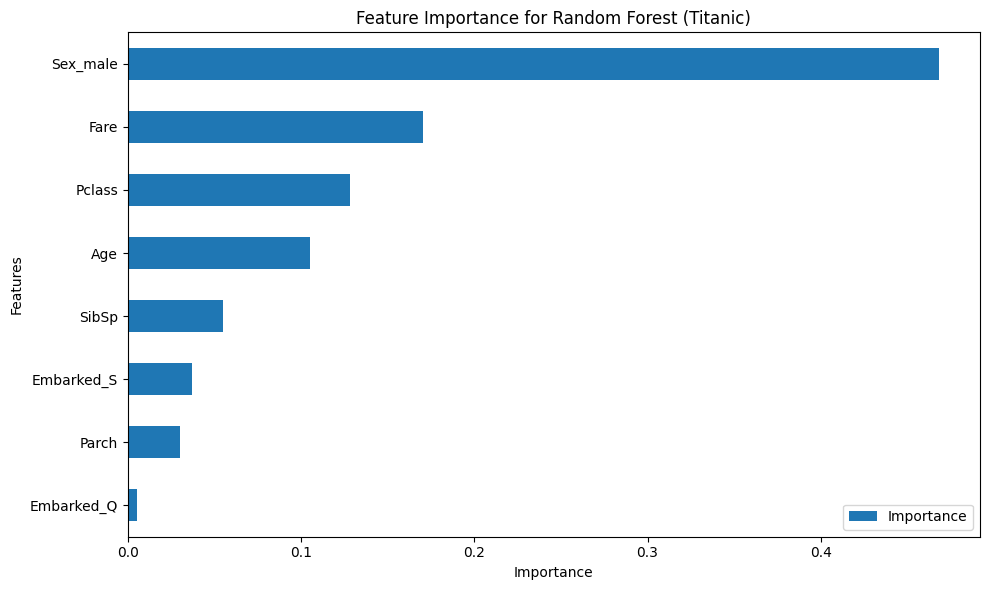

In [13]:
best_rf_estimator = cv_rf_ex.best_estimator_

feat_imp_df = pd.DataFrame({
    'Importance': best_rf_estimator.feature_importances_
}, index=feature_names)

# Sort and plot
plt.figure(figsize=(10, 6))
feat_imp_df.sort_values('Importance', ascending=True).plot.barh(ax=plt.gca())
plt.title('Feature Importance for Random Forest (Titanic)')
plt.ylabel('Features')
plt.xlabel('Importance')
plt.tight_layout()
plt.show() # Hiển thị biểu đồ

## Nhận Xét Biểu Đồ Tầm Quan Trọng của Thuộc Tính (Random Forest)

Biểu đồ thanh ngang này thể hiện **Tầm Quan Trọng (Importance)** của các thuộc tính trong mô hình Rừng Ngẫu Nhiên ($\text{Random Forest}$) để dự đoán khả năng sống sót trên tàu Titanic.

### 1. Phân Tích Các Thuộc Tính Quan Trọng Hàng Đầu

* **Sex\_male (Giới tính)**: Là yếu tố quan trọng **vượt trội** (Importance $\approx 0.44$), xác nhận lại rằng giới tính là biến có ảnh hưởng lớn nhất đến kết quả sống sót.
* **Fare (Giá vé)**: Là yếu tố quan trọng thứ hai (Importance $\approx 0.17$), cho thấy giá vé cao (thường đi kèm với hạng cabin tốt hơn) có mối liên hệ mạnh với việc sống sót.
* **Pclass (Hạng vé)**: Là yếu tố quan trọng thứ ba (Importance $\approx 0.12$), xác nhận rằng hạng vé có vai trò quan trọng trong việc phân loại.
* **Age (Tuổi)**: Đứng thứ tư (Importance $\approx 0.10$), cho thấy tuổi tác cũng là một yếu tố quan trọng, đặc biệt trong bối cảnh ưu tiên cứu hộ trẻ em.

### 2. Phân Tích Các Thuộc Tính Kém Quan Trọng

* Các thuộc tính như **SibSp**, **Embarked\_S**, **Parch**, và **Embarked\_Q** có tầm quan trọng **thấp** (dưới $0.05$), cho thấy chúng ít đóng góp vào khả năng dự đoán của mô hình so với $4$ thuộc tính hàng đầu.

### 3. Kết Luận

Mô hình **Random Forest** xác nhận rằng kết quả sống sót trên Titanic chủ yếu được quyết định bởi các yếu tố liên quan đến **đặc điểm cá nhân** và **vị thế kinh tế xã hội** của hành khách, dẫn đầu là $\text{Sex}$ và $\text{Fare}$. Các thuộc tính còn lại có thể bị giảm bớt hoặc loại bỏ mà không làm giảm đáng kể hiệu suất mô hình.